# 1. Importation des bibliothèques nécessaires

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Chemin vers les données traitées
processed_path = '../data/processed/brain-tumor-mri-dataset-processed/'

# 2. Chargement des données prétraitées

In [4]:
def load_data(processed_path):
    with open(os.path.join(processed_path, 'X_train.pkl'), 'rb') as f:
        X_train = pickle.load(f)
    with open(os.path.join(processed_path, 'y_train.pkl'), 'rb') as f:
        y_train = pickle.load(f)
    with open(os.path.join(processed_path, 'X_test.pkl'), 'rb') as f:
        X_test = pickle.load(f)
    with open(os.path.join(processed_path, 'y_test.pkl'), 'rb') as f:
        y_test = pickle.load(f)
    return X_train, y_train, X_test, y_test

print("Chargement des données...")
X_train, y_train, X_test, y_test = load_data(processed_path)


Chargement des données...


In [5]:
# Affichage des dimensions
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (5722, 128, 128, 1), y_train: (5722, 4)
X_test: (1431, 128, 128, 1), y_test: (1431, 4)


# 3. Définition du modèle CNN

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

c:\Users\ryann\anaconda3\envs\projet_synthese\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 4. Compilation du modèle

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,580 (12.61 MB)

 Trainable params: 3,304,580 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Entraînement du modèle avec EarlyStopping

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.5641 - loss: 0.9561 - val_accuracy: 0.7825 - val_loss: 0.5700
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.8048 - loss: 0.5028 - val_accuracy: 0.8218 - val_loss: 0.4089
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.8520 - loss: 0.3889 - val_accuracy: 0.8646 - val_loss: 0.3375
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.8900 - loss: 0.3044 - val_accuracy: 0.8952 - val_loss: 0.2809
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.9094 - loss: 0.2340 - val_accuracy: 0.9258 - val_loss: 0.2151
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.9363 - loss: 0.1570 - val_accuracy: 0.9345 - val_loss: 0.1901
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.9551 - loss: 0.1347 - val_accuracy: 0.9432 - val_loss: 0.1793
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.9434 - loss: 0

# 6. Évaluation sur l'ensemble de test

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9591 - loss: 0.1546

Test Accuracy: 95.04%
Test Loss: 0.1932


# 7. Visualisation des courbes d'apprentissage

Visualisation des courbes d'apprentissage :


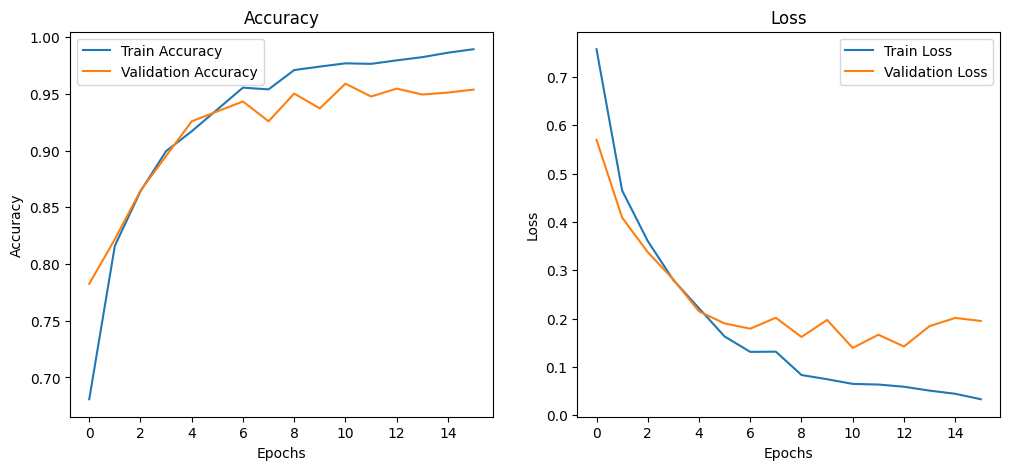

In [12]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

print("Visualisation des courbes d'apprentissage :")
plot_learning_curves(history)

# 8. Sauvegarde du modèle entraîné

In [17]:
model.save('../models/brain_tumor_cnn_model_v0_1.keras')
print("Modèle sauvegardé dans '../models/brain_tumor_cnn_model_v0_1.keras'.")

Modèle sauvegardé dans '../models/brain_tumor_cnn_model_v0_1.keras'.
